# **PREGUNTA 1**

Para la pregunta 1 se nos pide usando la libreria (https://pypi.org/project/bnlearn/) y un dataset a elección del estudiante que contenga 10000 datos como minimo, el cual se refleja en este link (https://www.kaggle.com/datasets/chandhurubaskar/campus-placement-data-for-engineering-colleges) aprender la estructura bayesiana y caracterizar los parametros y elementos de la red obtenida para luego hacer lo mismo pero con la mitad aleatorea de los datos del dataset. Obtenido esto, se nos pide realizar dos consultas iguales de inferencia a ambas redes para luego caracterizar y documentar los resultados obtenidos.


En primera instancia para llevar a cabo esta pregunta se instalan las librerias a utilizar.

//NOTA: NO TENGO MUY CLARO POR QUE DERREPENTE TIRA ERROR CON LA LIBRERIA NUMPY, PERO SE REINICIA EL ENTORNO DE EJECUCIÓN Y FUNCIONA CORRECTAMENTE.

In [1]:
! pip install bnlearn -q
! pip install pandas -q
! pip install kaggle -q
! pip install numpy -q

Luego de instalar las librerias, se procede a conectar la unidad de Google Drive en un entorno de Google Colab, con el fin de dejar el dataset en el drive.



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
! mkdir ~/.kaggle
! cp /content/drive/MyDrive/ColabNotebooks/kaggle/kaggle-2.json ~/.kaggle/kaggle.json
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d chandhurubaskar/campus-placement-data-for-engineering-colleges


mkdir: cannot create directory ‘/root/.kaggle’: File exists
campus-placement-data-for-engineering-colleges.zip: Skipping, found more recently modified local copy (use --force to force download)


Es necesario descomprimir el archivo ZIP ("campus-placement-data-for-engineering-colleges.zip") descargado anteriormente en el directorio en el que se está ejecutando el código Python, para esto se utiliza el siguiente codigo.

In [4]:
import zipfile
with zipfile.ZipFile('campus-placement-data-for-engineering-colleges.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

Luego se importan las librerias a utilizar para el desarrollo de la pregunta 1.




In [5]:
import pandas as pd
import bnlearn as bn

Para seguir, se lee el dataset y se muestran sus dimensiones y el dataset, mediante la función read_csv de la librería pandas.

El dataset contiene 10.000 filas y 12 columnas.

In [6]:
dataset = pd.read_csv('placedata v2.0 synthetic.csv')
print(dataset.shape)
print(dataset)

(10000, 12)
      StudentID  CGPA  Internships  Projects  Workshops/Certifications  \
0             1   7.5            1         1                         1   
1             2   8.9            0         3                         2   
2             3   7.3            1         2                         2   
3             4   7.5            1         1                         2   
4             5   8.3            1         2                         2   
...         ...   ...          ...       ...                       ...   
9995       9996   7.5            1         1                         2   
9996       9997   7.4            0         1                         0   
9997       9998   8.4            1         3                         0   
9998       9999   8.9            0         3                         2   
9999      10000   8.4            0         1                         1   

      AptitudeTestScore  SoftSkillsRating ExtracurricularActivities  \
0                    65     

Luego de guardar el dataset leido en la variable dataset, se procede a generar la estructura base de la red bayesiana mediante la función structure_learning.fit, para luego graficarla mediante la función plot ambas funciones de la libreria bnlearn.

Con la funcion structure_learning entiende el dataset y la importancia de cada columna, cada columna la representa como un nodo del grafo y determina las relaciones entre las columnas, osea la flechas del grafo, generando el grafo que se muestra a continuación.


[bnlearn] >Warning: Computing DAG with 12 nodes can take a very long time!
[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores for model comparison (higher is better).
[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


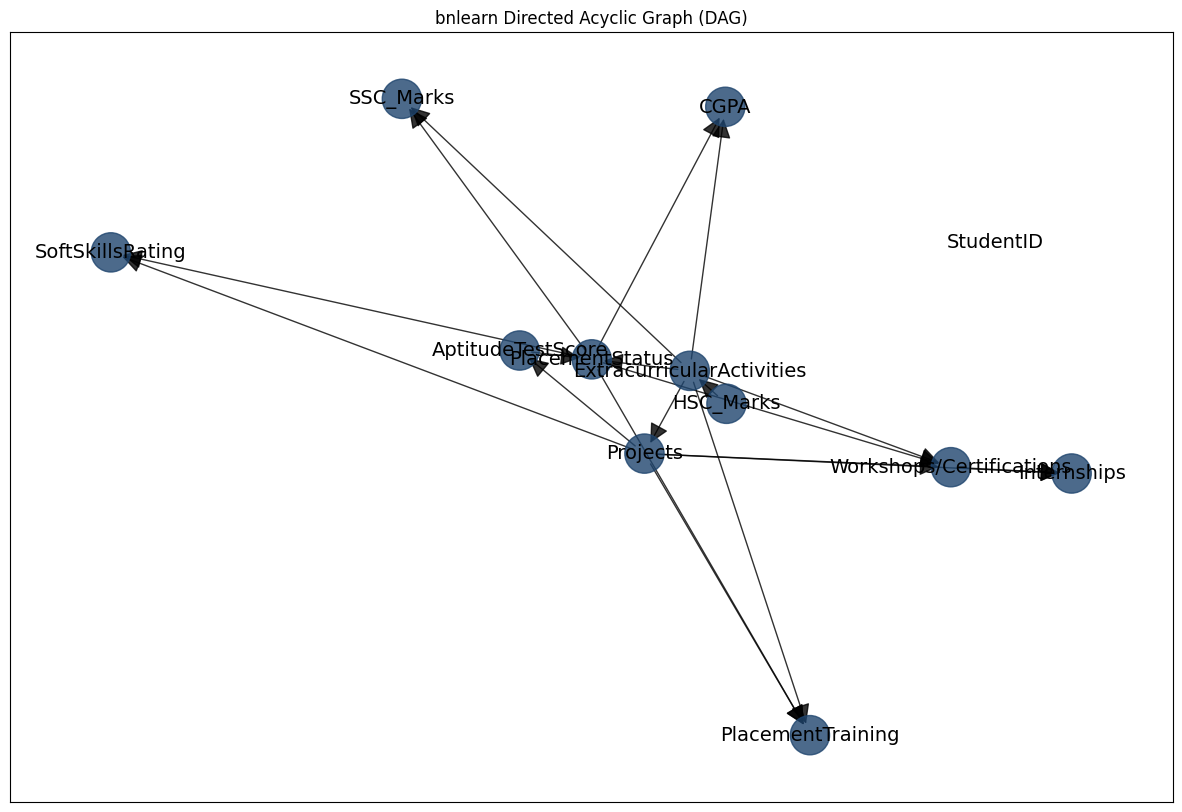

In [7]:
grafo1 = bn.structure_learning.fit(dataset)
plot = bn.plot(grafo1)

Una vez implementado el grafo, se utiliza la funcion parameter_learning.fit para entregarle a cada posible valor de los nodos, osea a cada posible valor de las columnas del dataset un valor de probabilidad lo cual nos ayudara a hacer las inferencias pedidas.




In [8]:
grafo1 = bn.parameter_learning.fit(grafo1,dataset,methodtype='bayes')

[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of Projects:
+---------------------------+-----+--------------------------------+
| ExtracurricularActivities | ... | ExtracurricularActivities(Yes) |
+---------------------------+-----+--------------------------------+
| Projects(0)               | ... | 0.023607176581680833           |
+---------------------------+-----+--------------------------------+
| Projects(1)               | ... | 0.1957821844507397             |
+---------------------------+-----+--------------------------------+
| Projects(2)               | ... | 0.2217500786905886             |
+---------------------------+-----+--------------------------------+
| Projects(3)               | ... | 0.5588605602769908             |
+---------------------------+-----+--------------------------------+
[bnlearn] >CPD of I

Ya obtenido todo lo anterior, se realizan dos consultas de inferencias, en donde la evidencia sera cualquier valor de alguna de las columnas no binarias y la variable que se evalua seran las columnas binarias.

1.  La primera consulta de inferencia corresponde a inferencia1, la cual se entiende como lo siguiente: ¿Cual es la probabilidad de que haya o ocurra PlacementTraining cuando HSC_Marks es igual a 88?

2. La segunda consulta de inferencia corresponde a inferencia2, la cual se entiende como lo siguiente: ¿ Cual es la probabilidad de que haya o ocurra ExtracurricularActivities cuando AptitudesTestsScore es igual a 60?

Realizadas estas inferencias, se obtienen dos tablas en donde se muestra la probabilidad de que haya o no haya PlacementTraining y ExtracurricularActivities cuando las variables mencionadas anteriormente son iguales a los valores.






In [9]:
inferencia1 = bn.inference.fit(grafo1, variables=['PlacementTraining'], evidence={'HSC_Marks':88})
print(inferencia1)

[bnlearn] >Variable Elimination.
[bnlearn] >Warning: variable(s) [None] does not exists in DAG.
[bnlearn] >Data is stored in [query.df]
+----+---------------------+----------+
|    | PlacementTraining   |        p |
+====+=====================+==========+
|  0 | No                  | 0.199585 |
+----+---------------------+----------+
|  1 | Yes                 | 0.800415 |
+----+---------------------+----------+
+------------------------+--------------------------+
| PlacementTraining      |   phi(PlacementTraining) |
+========================+==========================+
| PlacementTraining(No)  |                   0.1996 |
+------------------------+--------------------------+
| PlacementTraining(Yes) |                   0.8004 |
+------------------------+--------------------------+


In [10]:
inferencia2 = bn.inference.fit(grafo1, variables=['ExtracurricularActivities'], evidence={'AptitudeTestScore':60})
print(inferencia2)

[bnlearn] >Variable Elimination.
[bnlearn] >Warning: variable(s) [None] does not exists in DAG.
[bnlearn] >Data is stored in [query.df]
+----+-----------------------------+----------+
|    | ExtracurricularActivities   |        p |
+====+=============================+==========+
|  0 | No                          | 0.594052 |
+----+-----------------------------+----------+
|  1 | Yes                         | 0.405948 |
+----+-----------------------------+----------+
+--------------------------------+----------------------------------+
| ExtracurricularActivities      |   phi(ExtracurricularActivities) |
+================================+==================================+
| ExtracurricularActivities(No)  |                           0.5941 |
+--------------------------------+----------------------------------+
| ExtracurricularActivities(Yes) |                           0.4059 |
+--------------------------------+----------------------------------+


Una vez realizado lo anterior con el dataset completo, se nos pide realizar lo mismo pero con la mitad aleatorea del dataset. Por ende, se realizaran los mismos pasos que se mostraron anteriormente.

Mediante el siguiente codigo se lee el nuevo dataset y se muestran sus dimensiones y el nuevo dataset (en donde se puede ver que los datos con aleatoreos, ya que el ID de los estudiantes es variado).

El dataset contiene 5.000 filas y 12 columnas.

In [11]:
dataset2= dataset.sample(frac=0.5)
print(dataset2.shape)
print(dataset2)

(5000, 12)
      StudentID  CGPA  Internships  Projects  Workshops/Certifications  \
9968       9969   8.2            1         2                         2   
6135       6136   6.5            1         1                         1   
7021       7022   8.1            2         3                         2   
7594       7595   7.7            1         1                         0   
5474       5475   7.5            1         3                         0   
...         ...   ...          ...       ...                       ...   
253         254   8.1            0         2                         2   
6744       6745   7.5            1         1                         0   
1688       1689   6.7            1         1                         1   
1024       1025   8.1            1         1                         1   
6303       6304   8.4            2         3                         2   

      AptitudeTestScore  SoftSkillsRating ExtracurricularActivities  \
9968                 82      

Para seguir, al igual que en la primera parte, se guarda el nuevo dataset leido en la variable dataset2 y se procede a generar la estructura base de la red bayesiana mediante la función structure_learning.fit, para luego graficarla mediante la función plot ambas funciones de la libreria bnlearn.

Con la funcion structure_learning entiende el dataset y la importancia de cada columna, cada columna la representa como un nodo del grafo y determina las relaciones entre las columnas, osea la flechas del grafo, generando el nuevo grafo que se muestra a continuación.

[bnlearn] >Warning: Computing DAG with 12 nodes can take a very long time!
[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores for model comparison (higher is better).
[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


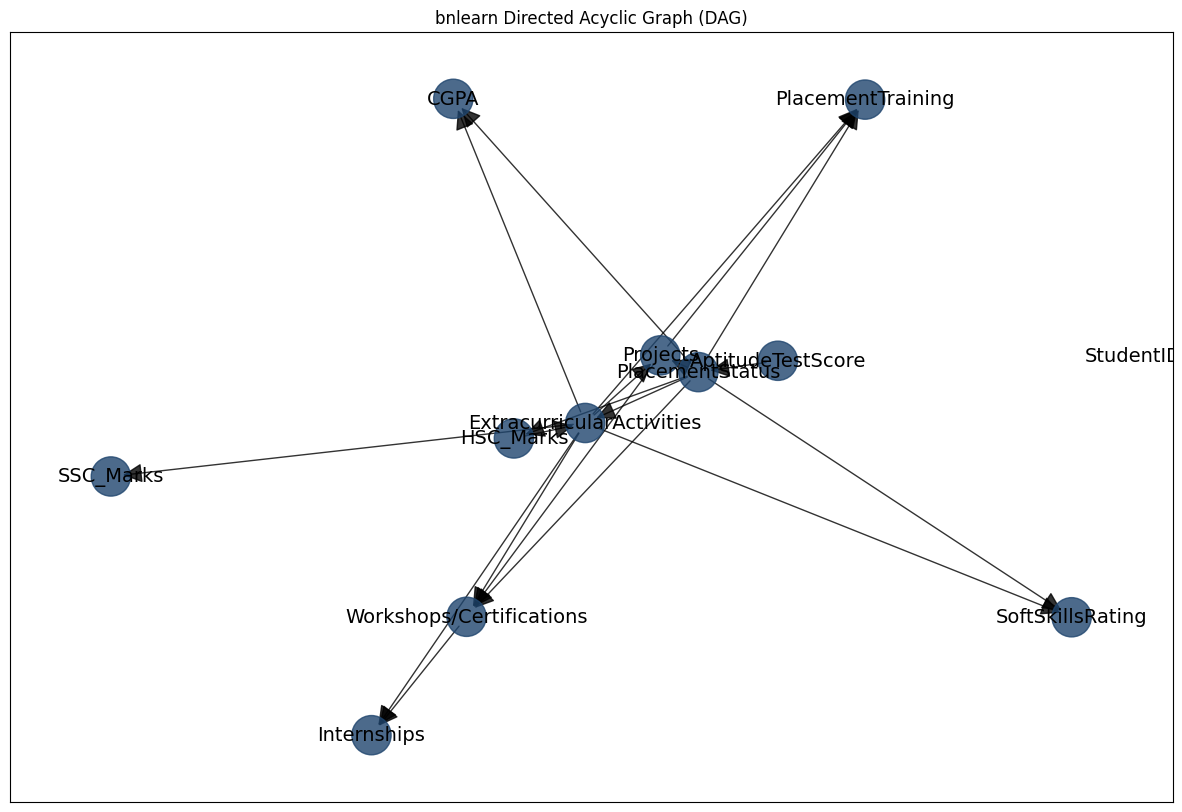

In [12]:
grafo2 = bn.structure_learning.fit(dataset2)
plot = bn.plot(grafo2)

Al igual que para el grafo1, se utiliza la funcion parameter_learning.fit para entregarle a cada posible valor de los nodos, osea a cada posible valor de las columnas del dataset2 un valor de probabilidad para el grafo2 lo cual nos ayudara a hacer las mismas inferencias pedidas con el nuevo grafo.

In [13]:
grafo2 = bn.parameter_learning.fit(grafo2,dataset2,methodtype='bayes')

[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of Projects:
+---------------------------+-----+--------------------------------+
| ExtracurricularActivities | ... | ExtracurricularActivities(Yes) |
+---------------------------+-----+--------------------------------+
| PlacementStatus           | ... | PlacementStatus(Placed)        |
+---------------------------+-----+--------------------------------+
| Projects(0)               | ... | 0.03552440792653456            |
+---------------------------+-----+--------------------------------+
| Projects(1)               | ... | 0.12155630739487676            |
+---------------------------+-----+--------------------------------+
| Projects(2)               | ... | 0.19018849685838568            |
+---------------------------+-----+--------------------------------+
| Projects(3)      

Al igual que para el grafo1 se realizan las mismas dos consultas de inferencia al grafo2, el cual contiene la mitad de los datos que el grafo1.

1. La primera consulta de inferencia corresponde a inferencia3, la cual se entiende como lo siguiente: ¿Cual es la probabilidad de que haya o ocurra PlacementTraining cuando HSC_Marks es igual a 88?

2. La segunda consulta de inferencia corresponde a inferencia4, la cual se entiende como lo siguiente: ¿ Cual es la probabilidad de que hayan o ocurra ExtracurricularActivities cuando AptitudesTestsScore es igual a 60?

Una vez obtenidas ambas consultas para ambos grafos, se presentara al final una breve conclusión respecto a lo obtenido.


In [14]:
inferencia3 = bn.inference.fit(grafo1, variables=['PlacementTraining'], evidence={'HSC_Marks':88})
print(inferencia3)

[bnlearn] >Variable Elimination.
[bnlearn] >Warning: variable(s) [None] does not exists in DAG.
[bnlearn] >Data is stored in [query.df]
+----+---------------------+----------+
|    | PlacementTraining   |        p |
+====+=====================+==========+
|  0 | No                  | 0.199585 |
+----+---------------------+----------+
|  1 | Yes                 | 0.800415 |
+----+---------------------+----------+
+------------------------+--------------------------+
| PlacementTraining      |   phi(PlacementTraining) |
+========================+==========================+
| PlacementTraining(No)  |                   0.1996 |
+------------------------+--------------------------+
| PlacementTraining(Yes) |                   0.8004 |
+------------------------+--------------------------+


In [15]:
inferencia4 = bn.inference.fit(grafo1, variables=['ExtracurricularActivities'], evidence={'AptitudeTestScore':60})
print(inferencia4)

[bnlearn] >Variable Elimination.
[bnlearn] >Warning: variable(s) [None] does not exists in DAG.
[bnlearn] >Data is stored in [query.df]
+----+-----------------------------+----------+
|    | ExtracurricularActivities   |        p |
+====+=============================+==========+
|  0 | No                          | 0.594052 |
+----+-----------------------------+----------+
|  1 | Yes                         | 0.405948 |
+----+-----------------------------+----------+
+--------------------------------+----------------------------------+
| ExtracurricularActivities      |   phi(ExtracurricularActivities) |
+================================+==================================+
| ExtracurricularActivities(No)  |                           0.5941 |
+--------------------------------+----------------------------------+
| ExtracurricularActivities(Yes) |                           0.4059 |
+--------------------------------+----------------------------------+


**CONCLUSION FINAL DE LA PREGUNTA 1**

Como conclusion podemos ver que realizadas las dos consultas de inferencias con ambos grafos, ya sea el grafo1 que contiene todos los datos del dataset y el grafo2 que contiene la mitad aleatorea del dataset se puede ver que ambas dan los mismo resultados para las dos consultas realizadas a ambos grafos.

Para la inferencia1 e inferencia3 (que son la misma, pero una para cada grafo) en donde se pregunta, ¿Cual es la probabilidad de que haya o ocurra PlacementTraining cuando HSC_Marks es igual a 88?, esto da como resultado que si ocurra un 0.800415 y de que no ocurra un 0.199585 en ambos casos y con ambos grafos.


Para la inferencia2 e inferencia4 (que son la misma, pero una para cada grafo) en donde se pregunta, ¿Cual es la probabilidad de que hayan ExtracurricularActivities cuando AptitudesTestsScore es igual a 60?, esto da como resultado que si ocurra un 0.594052 y de que no ocurra un 0.405948 en ambos casos y con ambos grafos.

Este resultado entregado por las inferencias se muestra igual para ambas, pero puede ser que varie en milesimas y esto no se vea reflejado, o que simplemente sean iguales, esto se puede deber a varias razones. Una de estas puede ser que el comportamiento de la red de bayes generada puede ser lineal, ya que al momento de sacarle datos esta se sigue comportando igual, lo cual significaria que la cantidad de datos no afecta considerablemente como podria ser para otra. Otra razon puede ser que al entrenar el modelo segun el dataset con las librerias y ajustarlo a una red de bayes (que es lo que se pide), por ende, esto quiere decir que el cambio generado en ambas redes no fue significativo, ya que se comporta de la misma manera.







# **PREGUNTA 2**

 ***PARTE A***

Para la pregunta numero 2, nos entregan un problema en donde un profesor se somete a una experiencia musical a travez de spotify. Durante un día cualquiera, el profesor nota que el orden en el que escucha las canciones sigue la distribución de probabilidad la cual se entrega mediante una matriz de 8x8, en donde cada elemento xij de la matriz indica la transición del grupo Gi al grupo Gj.
En base a esto se nos pide construir una cadena de Markov y responder lo siguiente:

1. Graficar como evoluciona la probabilidad de que este escuchando una canción de Manowar, Blind Guardian y Helloween, después de 200, 500 y 1000 canciones si esl profesor empieza escuchando una canción del grupo Blind Guardian

2. Determinar el estado estacionario de la cadena de Markov de manera
analítica, esto es, a través del sistema de ecuaciones visto en clases.
Comparando y analizando los resultados obtenidos con la primera parte.












Antes de empezar a realizar la parte a de la pregunta 2, se debe conocer lo siguiente, para un mejor entendimiento. Una cadena de markov es un modelo matematico que describe una secuencia de eventos en la que la probabilidad de que ocurra un evento en el futuro depende únicamente del evento actual y no de los eventos anteriores. Los componentes de una cadena de markov son:

1.   Matriz de transición: matriz cuadrada que describe las probabilidades de transición entre los estados. Cada elemento de la matriz representa la probabilidad de pasar de un estado a otro en un solo paso de tiempo.

2.   Estados: diferentes situaciones o condiciones en las que puede encontrarse un sistema.





Mencionado lo anterior,para comenzar a realizar la parte a, se importan las librerias a utilizar durante el desarrollo de la pregunta 2.


In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

A continuación se evidenciaran la respuesta de la parte a de la pregunta 2, en donde se pide graficar como evoluciona la probabilidad de que el profesor parta escuchando una cancion del grupo Blind Guardian y despues de 200, 500 y 1000 canciones este escuchando una cancion de Manowar, Blind Guardian y Helloween.

Para esto, se presentan 3 graficos, en donde se evidencia graficamente la probabilidad de evolución despues de 200, 500 y 1000 desde el grupo Blind Guardian a cada uno de los otros tres grupos (Manowar, Blind Guardian y Helloween).


Los tres bloques de codigo que siguen son los mismos, simplemente que cambia el numero de iteraciones, por ende se comenta lo realizado solo en el primer bloque de codigo.


PARA COMENZAR SE MOSTRARAN LOS GRAFICOS Y LAS RESPECTIVAS PROBABILIDADES DE CADA ITERACIÓN (200 PARA ESTE CASO) COMENZAR ESCUCHANDO UNA CANCION DEL GRUPO BLIND GUARDIAN Y QUE LUEGO DE LA ITERACIONES CORRESPONDIENTES SE ESTE ESCUCHANDO UNA CANCION DEL GRUPO HELLOWEEN, MANOWAR Y BLIND GUARDIAN.




Probabilidad por iteracion (200) de escuchar una canción de Helloween partiendo en Blind Guardian
0 ---> 0.15
1 ---> 0.16999999999999998
2 ---> 0.169102
3 ---> 0.16914262000000002
4 ---> 0.16913077120000003
5 ---> 0.169121612842
6 ---> 0.16912045619528002
7 ---> 0.169120140111329
8 ---> 0.16912008407472195
9 ---> 0.16912007395506445
10 ---> 0.16912007184603972
11 ---> 0.1691200714646111
12 ---> 0.1691200713900346
13 ---> 0.16912007137578916
14 ---> 0.16912007137310517
15 ---> 0.16912007137258833
16 ---> 0.1691200713724904
17 ---> 0.1691200713724717
18 ---> 0.16912007137246815
19 ---> 0.16912007137246748
20 ---> 0.16912007137246735
21 ---> 0.16912007137246732
22 ---> 0.16912007137246732
23 ---> 0.16912007137246732
24 ---> 0.16912007137246732
25 ---> 0.16912007137246732
26 ---> 0.16912007137246732
27 ---> 0.16912007137246732
28 ---> 0.16912007137246732
29 ---> 0.16912007137246732
30 ---> 0.16912007137246732
31 ---> 0.16912007137246732
32 ---> 0.16912007137246732
33 ---> 0.169120071372467

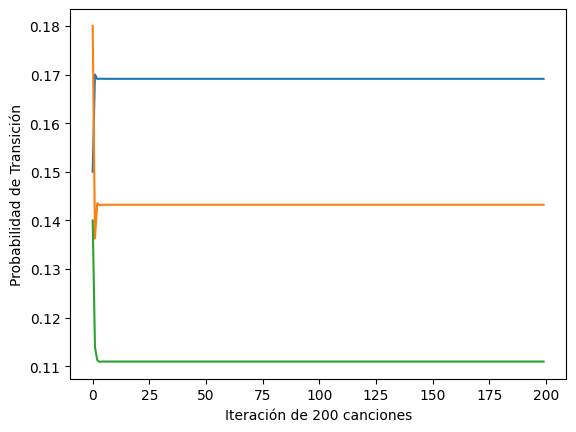

In [17]:
#Se define la matriz de transición.
MATRIZ = np.array([[0.27,0.13,0.09,0.02,0.10,0.11,0.15,0.13],
                   [0.17,0.18,0.00,0.15,0.14,0.13,0.12,0.11],
                   [0.15,0.13,0.05,0.07,0.11,0.19,0.19,0.11],
                   [0.19,0.11,0.15,0.15,0.12,0.11,0.12,0.05],
                   [0.11,0.20,0.17,0.14,0.18,0.11,0.07,0.02],
                   [0.07,0.12,0.11,0.12,0.27,0.09,0.03,0.19],
                   [0.15,0.10,0.12,0.08,0.18,0.07,0.14,0.16],
                   [0.21,0.09,0.06,0.13,0.05,0.17,0.08,0.21]])

#lista de estados, que en este caso cada numero corresponde a los grupos de canciones, que en este caso son 8, por eso son 8 estados.
estados = [1, 2, 3, 4, 5, 6, 7, 8]
#lista para indicar en que estado me encuentro, que en este caso corresponde al 7, es decir, el grupo Blind Guardian.
estado_actual = [0, 0, 0, 0, 0, 0, 1, 0]
temporal = [] #lista vacia para guardar los datos.

for x in range(200):#se crea un ciclo para iterar 200 veces.
#En esta linea se multiplica la matriz de estado_actual por la matriz de transicion y almacena cada resultado en estado_actual.
   estado_actual =np.dot(estado_actual , MATRIZ)
#agrega el valor actualizado de estado_actual a una lista llamada temporal.
   temporal.append(estado_actual)

temporal=np.array(temporal) #convierte la lista temporal en un arreglo NumPy.

#Recorro en los estados que me importa, osea Blind Guardian, Manowar y Helloween.
for i in [1,5,7]:
#busca el índice de la primera ocurrencia del valor i en la lista estados y almacena ese índice en la variable indice_temporal.
  indice_temporal = estados.index(i)
#la línea de código genera un gráfico de línea utilizando los valores de una columna específica del arreglo temporal. Cada punto en el gráfico representa un valor en esa columna.
  plt.plot(temporal[: , indice_temporal]) #La variable indice_temporal se utiliza para determinar qué columna específica se debe graficar.

#muestra las probabilidades de cada iteración para cada grupo.
print("Probabilidad por iteracion (200) de escuchar una canción de Helloween partiendo en Blind Guardian")
for i in range(200):
  print(i,"--->",temporal[i][0])

print("\n")
print("Probabilidad por iteracion (200) de escuchar una canción de Manowar partiendo en Blind Guardian")
for i in range(200):
  print(i,"--->",temporal[i][4])

print("\n")
print("Probabilidad por iteracion (200) de escuchar una canción de Blind Guardian partiendo en Blind Guardian")
for i in range(200):
  print(i,"--->", temporal[i][6])

#leyenda del grafico
print("\n")
print ("Grafico 1: Blind Guardian a Manowar, Blind Guardian y Helloween despues de 200 canciones")
print("\n")
print ("Helloween: corresponde a la linea de color azul.")
print ("Manowar: corresponde a la linea de color naranja.")
print ("Blind Guardian: corresponde a la linea de color verde.")
plt.xlabel("Iteración de 200 canciones")
plt.ylabel("Probabilidad de Transición")
plt.show() #mostrar el grafico obtenido.

LUEGO SE MOSTRARAN LOS GRAFICOS Y LAS RESPECTIVAS PROBABILIDADES DE CADA ITERACIÓN (500 PARA ESTE CASO) COMENZAR ESCUCHANDO UNA CANCION DEL GRUPO BLIND GUARDIAN Y QUE LUEGO DE LA ITERACIONES CORRESPONDIENTES SE ESTE ESCUCHANDO UNA CANCION DEL GRUPO HELLOWEEN, MANOWAR Y BLIND GUARDIAN.

Probabilidad por iteracion (500) de escuchar una canción de Helloween partiendo en Blind Guardian
0 ---> 0.15
1 ---> 0.16999999999999998
2 ---> 0.169102
3 ---> 0.16914262000000002
4 ---> 0.16913077120000003
5 ---> 0.169121612842
6 ---> 0.16912045619528002
7 ---> 0.169120140111329
8 ---> 0.16912008407472195
9 ---> 0.16912007395506445
10 ---> 0.16912007184603972
11 ---> 0.1691200714646111
12 ---> 0.1691200713900346
13 ---> 0.16912007137578916
14 ---> 0.16912007137310517
15 ---> 0.16912007137258833
16 ---> 0.1691200713724904
17 ---> 0.1691200713724717
18 ---> 0.16912007137246815
19 ---> 0.16912007137246748
20 ---> 0.16912007137246735
21 ---> 0.16912007137246732
22 ---> 0.16912007137246732
23 ---> 0.16912007137246732
24 ---> 0.16912007137246732
25 ---> 0.16912007137246732
26 ---> 0.16912007137246732
27 ---> 0.16912007137246732
28 ---> 0.16912007137246732
29 ---> 0.16912007137246732
30 ---> 0.16912007137246732
31 ---> 0.16912007137246732
32 ---> 0.16912007137246732
33 ---> 0.169120071372467

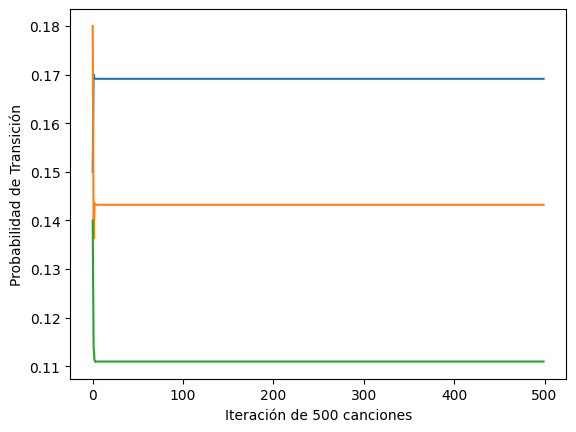

In [18]:
MATRIZ = np.array([[0.27,0.13,0.09,0.02,0.10,0.11,0.15,0.13],
                   [0.17,0.18,0.00,0.15,0.14,0.13,0.12,0.11],
                   [0.15,0.13,0.05,0.07,0.11,0.19,0.19,0.11],
                   [0.19,0.11,0.15,0.15,0.12,0.11,0.12,0.05],
                   [0.11,0.20,0.17,0.14,0.18,0.11,0.07,0.02],
                   [0.07,0.12,0.11,0.12,0.27,0.09,0.03,0.19],
                   [0.15,0.10,0.12,0.08,0.18,0.07,0.14,0.16],
                   [0.21,0.09,0.06,0.13,0.05,0.17,0.08,0.21]])

estados = [1, 2, 3, 4, 5, 6, 7, 8]
estado_actual = [0, 0, 0, 0, 0, 0, 1, 0]
temporal = []

for x in range(500):
   estado_actual =np.dot(estado_actual , MATRIZ)
   temporal.append(estado_actual)

temporal=np.array(temporal)

for i in [1,5,7]:
  indice_temporal = estados.index(i)
  plt.plot(temporal[: , indice_temporal])

print("Probabilidad por iteracion (500) de escuchar una canción de Helloween partiendo en Blind Guardian")
for i in range(500):
  print(i,"--->",temporal[i][0])

print("\n")
print("Probabilidad por iteracion (500) de escuchar una canción de Manowar partiendo en Blind Guardian")
for i in range(500):
  print(i,"--->",temporal[i][4])

print("\n")
print("Probabilidad por iteracion (500) de escuchar una canción de Blind Guardian partiendo en Blind Guardian")
for i in range(500):
  print(i,"--->",temporal[i][6])

print("\n")
print ("Grafico 2: Blind Guardian a Manowar, Blind Guardian y Helloween despues de 500 canciones")
print("\n")
print ("Helloween: corresponde a la linea de color azul.")
print ("Manowar: corresponde a la linea de color naranja.")
print ("Blind Guardian: corresponde a la linea de color verde.")
plt.xlabel("Iteración de 500 canciones")
plt.ylabel("Probabilidad de Transición")
plt.show()

Y FINALMENTE SE MOSTRARAN LOS GRAFICOS Y LAS RESPECTIVAS PROBABILIDADES DE CADA ITERACIÓN (1000 PARA ESTE CASO) COMENZAR ESCUCHANDO UNA CANCION DEL GRUPO BLIND GUARDIAN Y QUE LUEGO DE LA ITERACIONES CORRESPONDIENTES SE ESTE ESCUCHANDO UNA CANCION DEL GRUPO HELLOWEEN, MANOWAR Y BLIND GUARDIAN.

Probabilidad por iteracion (1000) de escuchar una canción de Helloween partiendo en Blind Guardian
0 ---> 0.15
1 ---> 0.16999999999999998
2 ---> 0.169102
3 ---> 0.16914262000000002
4 ---> 0.16913077120000003
5 ---> 0.169121612842
6 ---> 0.16912045619528002
7 ---> 0.169120140111329
8 ---> 0.16912008407472195
9 ---> 0.16912007395506445
10 ---> 0.16912007184603972
11 ---> 0.1691200714646111
12 ---> 0.1691200713900346
13 ---> 0.16912007137578916
14 ---> 0.16912007137310517
15 ---> 0.16912007137258833
16 ---> 0.1691200713724904
17 ---> 0.1691200713724717
18 ---> 0.16912007137246815
19 ---> 0.16912007137246748
20 ---> 0.16912007137246735
21 ---> 0.16912007137246732
22 ---> 0.16912007137246732
23 ---> 0.16912007137246732
24 ---> 0.16912007137246732
25 ---> 0.16912007137246732
26 ---> 0.16912007137246732
27 ---> 0.16912007137246732
28 ---> 0.16912007137246732
29 ---> 0.16912007137246732
30 ---> 0.16912007137246732
31 ---> 0.16912007137246732
32 ---> 0.16912007137246732
33 ---> 0.16912007137246

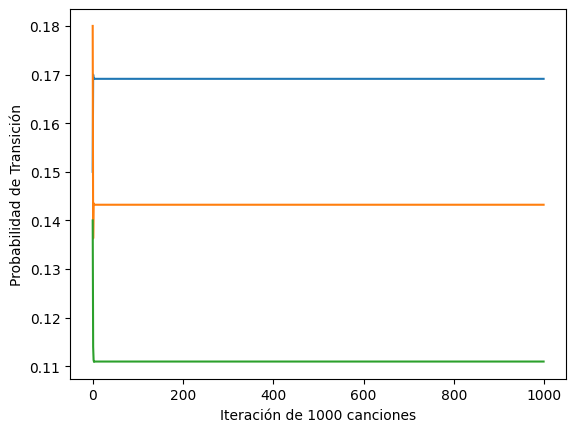

In [19]:
MATRIZ = np.array([[0.27,0.13,0.09,0.02,0.10,0.11,0.15,0.13],
                   [0.17,0.18,0.00,0.15,0.14,0.13,0.12,0.11],
                   [0.15,0.13,0.05,0.07,0.11,0.19,0.19,0.11],
                   [0.19,0.11,0.15,0.15,0.12,0.11,0.12,0.05],
                   [0.11,0.20,0.17,0.14,0.18,0.11,0.07,0.02],
                   [0.07,0.12,0.11,0.12,0.27,0.09,0.03,0.19],
                   [0.15,0.10,0.12,0.08,0.18,0.07,0.14,0.16],
                   [0.21,0.09,0.06,0.13,0.05,0.17,0.08,0.21]])

estados = [1, 2, 3, 4, 5, 6, 7, 8]
estado_actual = [0, 0, 0, 0, 0, 0, 1, 0]
temporal = []

for x in range(1000):
   estado_actual =np.dot(estado_actual , MATRIZ)
   temporal.append(estado_actual)

temporal=np.array(temporal)

for i in [1,5,7]:
  indice_temporal = estados.index(i)
  plt.plot(temporal[: , indice_temporal])

print("Probabilidad por iteracion (1000) de escuchar una canción de Helloween partiendo en Blind Guardian")
for i in range(1000):
  print(i,"--->",temporal[i][0])

print("\n")
print("Probabilidad por iteracion (1000) de escuchar una canción de Manowar partiendo en Blind Guardian")
for i in range(1000):
  print(i,"--->",temporal[i][4])

print("\n")
print("Probabilidad por iteracion (1000) de escuchar una canción de Blind Guardian partiendo en Blind Guardian")
for i in range(1000):
  print(i,"--->",temporal[i][6])


print("\n")
print ("Grafico 3: Blind Guardian a Manowar, Blind Guardian y Helloween despues de 1000 canciones")
print("\n")
print ("Helloween: corresponde a la linea de color azul.")
print ("Manowar: corresponde a la linea de color naranja.")
print ("Blind Guardian: corresponde a la linea de color verde.")
plt.xlabel("Iteración de 1000 canciones")
plt.ylabel("Probabilidad de Transición")
plt.show()


FINALMENTE, COMO CONCLUSIÓN DE LOS DATOS Y GRAFICOS OBTENIDOS ANTERIORMENTE, PODEMOS VER QUE LAS PROBABILIDADES DESPUES DE 200, 500 Y 1000 CANCIONES O ITERACIONES PARA CADA GRUPO DE CANCIONES (BLIND GUARDIAN, MANOWAR Y HELLOWEEN) SE ESTACIONAN DESPUES DE LA 21 CANCION APROXIMADAMENTE, TENIENDO LA MISMA PROBABILIDAD DESPUES PARA TODAS LAS ITERACIONES SIGUIENTES.

ADEMAS PODEMOS VER QUE LOS VALORES DE PROBABILIDAD VARIAN PERO SE ESTACIONAN, ES DECIR, SE MANTIENEN CONSTANTES A PARTIR DE LA 21 ITERACIÓN(CANCION) APROXIMADAMENTE, Y LUEGO EL VALOR DE LA PROBABILIDAD SE ESTACIONA EN 0.16912007137246732 PARA ESCUCHAR UNA CANCION DE HELLOWEEN, EN 0.14322864742559516 PARA MANOWAR Y
EN 0.11098677815624744 PARA BLIND GUARDIAN.

POR ENDE, PODEMOS DECIR QUE INDEPENDIENTE DE LAS ITERACIONES QUE SE HAGAN DESPUES DE LA ITERACIÓN 21 APROXIMADAMENTE LA PROBABILIDAD SERA LA MISMA PARA TODAS LAS ITERACIONES QUE LE SIGUEN PARA LLEGAR A ESCUCHAR UNA CANCION DE ALGUNO DE LOS GRUPOS.


***PARTE B***

Para la parte b de la pregunta 2, se nos pide determinar el estado estacionario de la cadena de Markov de manera analitica mediante un sistema de ecuaciones y comparar y analizar los resultados obtenidos con la parte a.


Antes de comenzar a desarrollar la parte b de la pregunta 2, se debe conocer lo siguiente:

El estado estacionario de una cadena de Markov es un vector de probabilidad que describe la probabilidad de estar en cada estado cuando la cadena ha evolucionado indefinidamente en el tiempo.

El estado estacionario se caracteriza por dos propiedades:
1.  Invariancia: La probabilidad de estar en un estado estacionario no cambia cuando se aplica la matriz de transición repetidamente.
2.  Suma a 1: La suma de las probabilidades en el estado estacionario es igual a 1.

Ademas, se debe saber lo que es un autovector y autovalor de una matriz en el contexto de las cadenas de Markov.

1. Autovalor: Representan la tasa de convergencia o divergencia de las probabilidades en los estados hacia un estado estacionario

2. Autovector: Cada autovector corresponde a un autovalor y representa una distribución de probabilidad en los estados de la cadena de Markov en un estado específico en el que la cadena se encuentra en equilibrio. (estados estacionarios)



Para comenzar con esto, podemos ver que el sistema de ecuaciones entregado en clases, corresponde al siguiente:

1.   πT = π
2.   π1 + π2 + π3 + ... + πn = 1

Para esto, se presenta el siguiente bloque de codigo con el cual se encuentran  y grafican los valores de cada estado.


Vector de estado estacionario:
[0.16912007 0.13528795 0.0939366  0.10524766 0.14322865 0.12065996
 0.11098678 0.12153233]


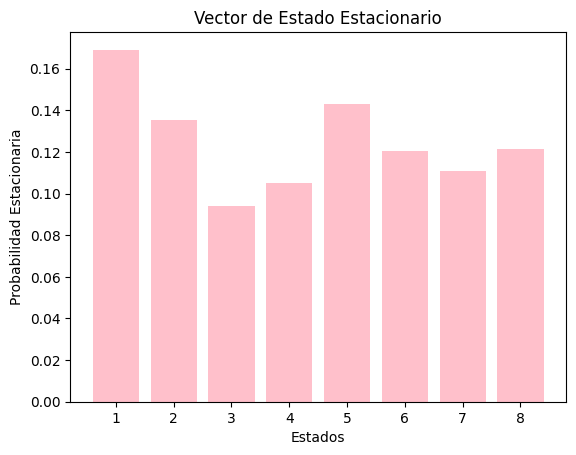

In [20]:
import numpy as np #se importa la libreria numpy.

# Definir la matriz de transición MATRIZ
MATRIZ= np.array([[0.27,0.13,0.09,0.02,0.10,0.11,0.15,0.13],
                  [0.17,0.18,0.00,0.15,0.14,0.13,0.12,0.11],
                  [0.15,0.13,0.05,0.07,0.11,0.19,0.19,0.11],
                  [0.19,0.11,0.15,0.15,0.12,0.11,0.12,0.05],
                  [0.11,0.20,0.17,0.14,0.18,0.11,0.07,0.02],
                  [0.07,0.12,0.11,0.12,0.27,0.09,0.03,0.19],
                  [0.15,0.10,0.12,0.08,0.18,0.07,0.14,0.16],
                  [0.21,0.09,0.06,0.13,0.05,0.17,0.08,0.21]])

# Calcular el estado estacionario
auto_valores, auto_vectores = np.linalg.eig(MATRIZ.T)  #se calculan los autovalores y autovectores de la matriz de transicion traspuesta.
#encuentra el indice del autovalor mas cercano a 1 dentro de un grupo de autovalores, ya que este es importante por que se relaciona con la tasa de convergencia hacia el estado estacionario.
indice_estacionario = np.argmin(np.abs(auto_valores - 1.0))
#toma un vector_estacionario específico de la matriz auto_vectores, extrae la parte real de sus elementos y almacena ese auto_vector con elementos reales en la variable vector_estacionario.
vector_estacionario = np.real(auto_vectores[:, indice_estacionario])
#normalizar el vector_estacionario para asegurar que la suma de todos los elemtos sea igual a 1.
vector_estacionario /= vector_estacionario.sum()

# Imprimir el resultado
print("Vector de estado estacionario:")
print(vector_estacionario)

#crea un arreglo estados que contiene una secuencia de números enteros que representan estados numerados consecutivamente, comenzando desde 1 y aumentando en 1.
estados = np.arange(len(vector_estacionario))+1

# Mostrar el vector de estado estacionario en un gráfico.
plt.bar(estados, vector_estacionario, color='pink')
plt.xlabel('Estados')
plt.ylabel('Probabilidad Estacionaria')
plt.title('Vector de Estado Estacionario')
plt.xticks(estados)
plt.show()

Una vez obtenidos los resultados anteriores, podemos ver que la probabilidad de cada estado correponde a las siguientes:                              

1.   ESTADO 1: 0.16912007
2.   ESTADO 2: 0.13528795
3.   ESTADO 3: 0.0939366
4.   ESTADO 4: 0.10524766
5.   ESTADO 5: 0.14322865
6.   ESTADO 6: 0.12065996
7.   ESTADO 7: 0.11098678
8.   ESTADO 8: 0.12153233

y que todas estas probabilidades suman 1, tal como nos evidencia la ecuación entregada anteriormente.
Por lo tanto, podemos ver que resolviendo el sistema lineal obtenemos los siguientes valores para cada estado π(1,2,3,4,5,6,7,8) =[0.16912007, 0.13528795, 0.0939366, 0.10524766, 0.14322865, 0.12065996, 0.11098678, 0.12153233] que corresponden a la distribucion estacionaria de la cadena de markov.

Finalmente, obtenidos estos valores y los valores y graficos de la letra a, podemos ver claramente como las probabilidades despues de la iteracion 21 se estacionan en un valor identico al valor estacionario del estado 1,5 y 7 independiente de las iteraciones realizadas para cada grupo de la canción a la que se quiere llegar a escuchar empezando en una canción del grupo 7.

Por ende, podemos decir que la cadena de Markov evoluciona en el tiempo y llega a un punto en el que la distribución de probabilidades sobre los estados deja de cambiar, es decir, se vuelve estacionaria, entonces esa distribución corresponde al estado estacionario de la cadena.

Como conclusión final podemos ver que todos los valores de probabilidad obtenidos en a se estacionan a partir de la cancion 21 en el valor del estado estacionario entregado en la parte b del estado o grupo de cancion en este caso al cual se quiere llegar a escuchar despues de las iteraciones pedidad, ya sea 200, 500 y 1000. Por ende, podemos decir que el valor de probabilidad de cada interación(cancion en este caso) se estaciona a partir de la cancion 21 en el mismo valor del estado estacionario del grupo de canción a la cual se quiere escuchar despues de las iteraciones correspondientes.

1.   ESTADO 1(HELLOWEEN): 0.16912007
2.   ESTADO 5(MANOWAR): 0.14322865
3.   ESTADO 7(BLIND GUARDIAN): 0.11098678


Y COMO SE VE EN LA PARTE A LUEGO DE LA 21 ITERACIÓN EL VALOR ES EL MISMO QUE EL ESTADO ESTACIONARIO OBTENIDO EN B PARA ESCUCHAR UNA CANCION DEL GRUPO BLIND GUARDIAN, MANOWAR Y HELLOWEEN DESPUES DE 200,500 Y 1000 ITERACIONES.